In [1]:
# coding='utf8'
import tushare as ts
import pandas as pd


In [92]:
class StockData(object):
    def __init__(self):
        self.pro = ts.pro_api('32ad......')

    # 这里可以自定义开始到结束的时间，还有股票代码，使用的时候设置
    def get_data(self,code, start='19900101', end='20200722'):
        stock_code = self.tran_code(code)
        return self.pro.query('daily', ts_code=stock_code, start_date=start, end_date=end)

    def tran_code(self,code):
        if code[0:1] == '6':
            return code + '.SH'
        else:
            return code + '.SZ'
stock = StockData()
data_train = stock.get_data("600519", start = '20000501',end = '20191201')
data_test = stock.get_data("600519", start = '20200101',end = '20200301')
print(data_test.head())

     ts_code trade_date    open     high      low    close  pre_close  change  \
0  600519.SH   20200228  1070.3  1082.00  1049.97  1057.00    1087.39  -30.39   
1  600519.SH   20200227  1076.0  1094.99  1076.00  1087.39    1073.70   13.69   
2  600519.SH   20200226  1062.0  1084.00  1055.00  1073.70    1074.81   -1.11   
3  600519.SH   20200225  1078.0  1082.09  1067.88  1074.81    1087.18  -12.37   
4  600519.SH   20200224  1105.5  1110.00  1085.50  1087.18    1112.88  -25.70   

   pct_chg       vol       amount  
0  -2.7948  49946.57  5307929.213  
1   1.2750  34498.29  3758783.810  
2  -0.1033  43560.97  4663278.433  
3  -1.1378  38385.62  4127432.130  
4  -2.3093  38650.36  4221857.466  


In [93]:
data_train.shape

(4357, 11)

In [18]:
# data_train.shape
data_train.head(10)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600519.SH,20191129,1165.50,1165.50,1112.89,1129.00,1175.80,-46.80,-3.9803,82397.32,9338326.554
1,600519.SH,20191128,1194.97,1197.51,1169.02,1175.80,1189.95,-14.15,-1.1891,28844.99,3405325.549
2,600519.SH,20191127,1192.80,1196.62,1184.51,1189.95,1185.00,4.95,0.4177,19848.81,2363839.726
3,600519.SH,20191126,1186.68,1198.60,1183.00,1185.00,1182.06,2.94,0.2487,40239.61,4794179.893
4,600519.SH,20191125,1188.05,1194.00,1172.06,1182.06,1194.00,-11.94,-1.0000,38281.75,4518778.939
5,600519.SH,20191122,1223.00,1229.00,1185.00,1194.00,1231.30,-37.30,-3.0293,47054.28,5677646.465
6,600519.SH,20191121,1231.00,1235.51,1221.06,1231.30,1233.75,-2.45,-0.1986,19187.39,2356277.766
7,600519.SH,20191120,1230.00,1239.51,1228.06,1233.75,1232.32,1.43,0.1160,15280.53,1884957.278
8,600519.SH,20191119,1228.00,1241.61,1225.02,1232.32,1227.28,5.04,0.4107,20623.75,2542105.913
9,600519.SH,20191118,1225.12,1229.45,1218.00,1227.28,1224.90,2.38,0.1943,18037.66,2204546.132


In [28]:
cols = ['open','high','low','close']
# data_train.iloc[:3]

In [146]:
# n = data_train.shape[0]
X_train = []
y_train = []
for i in range(0,n-5):
    cur = data_train.iloc[i:i+5,[2,3,4,5]]
    temp = []
    for j in cur.values:
        temp+=list(j)
    X_train.append(temp)
    y_train.append(data_train.iloc[i+5,5])
    

In [149]:
# X_train = pd.DataFrame(X_train)
# X_train = X_train.values
# import numpy as np
# c = np.array(X_train)[np.newaxis,:]
# y_train = np.array(y_train)
# y_train3 = y_train2[np.newaxis,:]
# y_train3.shape
# X_train2 = X_train2.reshape((464,1,20))
# X_train2.shape
# y_train[:,np.newaxis].shape
# y_train[:,np.newaxis][:,np.newaxis][:5]
# len(y_train)
# X_train2 = X_train2.reshape((2304,1,80))
# y_train = np.array(y_train)
# y_train.shape
X_train3 = X_train2.reshape((2319,5,4))
# X_train[:5]
# y_train[:5]
# X_train2.shape

In [133]:
# data_train = data_train[::-1]
data_train.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
4356,600519.SH,20010827,34.51,37.78,32.85,35.55,31.39,4.16,13.25,406318.00,1410347.179
4355,600519.SH,20010828,34.99,37.00,34.61,36.86,35.55,1.31,3.69,129647.79,463463.143
4354,600519.SH,20010829,36.98,37.00,36.10,36.38,36.86,-0.48,-1.30,53252.75,194689.620
4353,600519.SH,20010830,36.28,37.51,36.00,37.10,36.38,0.72,1.98,48013.06,177558.558
4352,600519.SH,20010831,37.15,37.62,36.80,37.01,37.10,-0.09,-0.24,23231.48,86231.237


In [134]:
# len(X_train),len(y_train)
# y_train[:1]
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
from keras.layers import RepeatVector
import keras

In [165]:
model = Sequential()

model.add(LSTM(6, input_shape=(X_train3.shape[1], X_train3.shape[2]), return_sequences=False))

# model.add(Dense(5,kernel_initializer="uniform",activation='relu'))        
model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

adam = keras.optimizers.Adam(learning_rate=0.1,decay=0.5)
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 6)                 264       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [169]:
# model.get_weights()[3].shape
history = model.fit(X_train3, y_train, epochs=1000, verbose=2, shuffle=False)

Epoch 1/1000
 - 0s - loss: 58.6173
Epoch 2/1000
 - 0s - loss: 58.4955
Epoch 3/1000
 - 0s - loss: 58.3897
Epoch 4/1000
 - 0s - loss: 58.3718
Epoch 5/1000
 - 0s - loss: 58.3172
Epoch 6/1000
 - 0s - loss: 58.1216
Epoch 7/1000
 - 0s - loss: 58.0484
Epoch 8/1000
 - 0s - loss: 57.9873
Epoch 9/1000
 - 0s - loss: 57.7967
Epoch 10/1000
 - 0s - loss: 57.4641
Epoch 11/1000
 - 0s - loss: 57.6525
Epoch 12/1000
 - 0s - loss: 57.5005
Epoch 13/1000
 - 0s - loss: 57.0726
Epoch 14/1000
 - 0s - loss: 57.4175
Epoch 15/1000
 - 0s - loss: 57.4189
Epoch 16/1000
 - 0s - loss: 57.0986
Epoch 17/1000
 - 0s - loss: 57.0895
Epoch 18/1000
 - 0s - loss: 56.9097
Epoch 19/1000
 - 0s - loss: 56.8850
Epoch 20/1000
 - 0s - loss: 56.4553
Epoch 21/1000
 - 0s - loss: 56.7961
Epoch 22/1000
 - 0s - loss: 56.4067
Epoch 23/1000
 - 0s - loss: 56.4136
Epoch 24/1000
 - 0s - loss: 56.5620
Epoch 25/1000
 - 0s - loss: 55.9420
Epoch 26/1000
 - 0s - loss: 56.0485
Epoch 27/1000
 - 0s - loss: 55.9173
Epoch 28/1000
 - 0s - loss: 55.8360
E

 - 0s - loss: 47.7237
Epoch 226/1000
 - 0s - loss: 47.7151
Epoch 227/1000
 - 0s - loss: 47.6221
Epoch 228/1000
 - 0s - loss: 47.8743
Epoch 229/1000
 - 0s - loss: 47.4471
Epoch 230/1000
 - 0s - loss: 47.3824
Epoch 231/1000
 - 0s - loss: 47.4004
Epoch 232/1000
 - 0s - loss: 47.2474
Epoch 233/1000
 - 0s - loss: 47.4838
Epoch 234/1000
 - 0s - loss: 47.1090
Epoch 235/1000
 - 0s - loss: 47.0222
Epoch 236/1000
 - 0s - loss: 47.1660
Epoch 237/1000
 - 0s - loss: 46.8740
Epoch 238/1000
 - 0s - loss: 46.8985
Epoch 239/1000
 - 0s - loss: 46.7016
Epoch 240/1000
 - 0s - loss: 47.1203
Epoch 241/1000
 - 0s - loss: 46.6973
Epoch 242/1000
 - 0s - loss: 46.4665
Epoch 243/1000
 - 0s - loss: 47.1471
Epoch 244/1000
 - 0s - loss: 46.6767
Epoch 245/1000
 - 0s - loss: 46.3844
Epoch 246/1000
 - 0s - loss: 46.3553
Epoch 247/1000
 - 0s - loss: 46.0892
Epoch 248/1000
 - 0s - loss: 46.4567
Epoch 249/1000
 - 0s - loss: 46.0774
Epoch 250/1000
 - 0s - loss: 45.8575
Epoch 251/1000
 - 0s - loss: 46.4713
Epoch 252/1000
 

Epoch 447/1000
 - 0s - loss: 31.1289
Epoch 448/1000
 - 0s - loss: 31.9708
Epoch 449/1000
 - 0s - loss: 31.6003
Epoch 450/1000
 - 0s - loss: 31.0422
Epoch 451/1000
 - 0s - loss: 31.1858
Epoch 452/1000
 - 0s - loss: 31.7511
Epoch 453/1000
 - 0s - loss: 33.1052
Epoch 454/1000
 - 0s - loss: 31.1709
Epoch 455/1000
 - 0s - loss: 31.9818
Epoch 456/1000
 - 0s - loss: 30.9802
Epoch 457/1000
 - 0s - loss: 31.4113
Epoch 458/1000
 - 0s - loss: 31.1943
Epoch 459/1000
 - 0s - loss: 30.3715
Epoch 460/1000
 - 0s - loss: 30.7098
Epoch 461/1000
 - 0s - loss: 30.7619
Epoch 462/1000
 - 0s - loss: 30.7176
Epoch 463/1000
 - 0s - loss: 30.7980
Epoch 464/1000
 - 0s - loss: 29.9437
Epoch 465/1000
 - 0s - loss: 29.7842
Epoch 466/1000
 - 0s - loss: 29.8249
Epoch 467/1000
 - 0s - loss: 29.6291
Epoch 468/1000
 - 0s - loss: 29.6217
Epoch 469/1000
 - 0s - loss: 29.4068
Epoch 470/1000
 - 0s - loss: 29.2512
Epoch 471/1000
 - 0s - loss: 29.1870
Epoch 472/1000
 - 0s - loss: 29.1096
Epoch 473/1000
 - 0s - loss: 29.0509
E

Epoch 669/1000
 - 0s - loss: 20.8361
Epoch 670/1000
 - 0s - loss: 20.9591
Epoch 671/1000
 - 0s - loss: 20.8541
Epoch 672/1000
 - 0s - loss: 21.5856
Epoch 673/1000
 - 0s - loss: 21.8325
Epoch 674/1000
 - 0s - loss: 21.6091
Epoch 675/1000
 - 0s - loss: 20.4076
Epoch 676/1000
 - 0s - loss: 20.3248
Epoch 677/1000
 - 0s - loss: 20.8617
Epoch 678/1000
 - 0s - loss: 20.9298
Epoch 679/1000
 - 0s - loss: 20.5979
Epoch 680/1000
 - 0s - loss: 20.1002
Epoch 681/1000
 - 0s - loss: 20.5165
Epoch 682/1000
 - 0s - loss: 20.7249
Epoch 683/1000
 - 0s - loss: 20.4969
Epoch 684/1000
 - 0s - loss: 20.0330
Epoch 685/1000
 - 0s - loss: 20.1331
Epoch 686/1000
 - 0s - loss: 19.7823
Epoch 687/1000
 - 0s - loss: 19.8610
Epoch 688/1000
 - 0s - loss: 19.9571
Epoch 689/1000
 - 0s - loss: 19.4362
Epoch 690/1000
 - 0s - loss: 19.6831
Epoch 691/1000
 - 0s - loss: 20.2728
Epoch 692/1000
 - 0s - loss: 19.6235
Epoch 693/1000
 - 0s - loss: 20.3162
Epoch 694/1000
 - 0s - loss: 19.2440
Epoch 695/1000
 - 0s - loss: 19.3472
E

Epoch 891/1000
 - 0s - loss: 12.7536
Epoch 892/1000
 - 0s - loss: 12.6011
Epoch 893/1000
 - 0s - loss: 12.6355
Epoch 894/1000
 - 0s - loss: 12.6926
Epoch 895/1000
 - 0s - loss: 12.4229
Epoch 896/1000
 - 0s - loss: 12.5510
Epoch 897/1000
 - 0s - loss: 12.4842
Epoch 898/1000
 - 0s - loss: 12.3793
Epoch 899/1000
 - 0s - loss: 12.5265
Epoch 900/1000
 - 0s - loss: 12.2400
Epoch 901/1000
 - 0s - loss: 11.9678
Epoch 902/1000
 - 0s - loss: 12.3016
Epoch 903/1000
 - 0s - loss: 12.4614
Epoch 904/1000
 - 0s - loss: 12.2535
Epoch 905/1000
 - 0s - loss: 12.0614
Epoch 906/1000
 - 0s - loss: 11.4776
Epoch 907/1000
 - 0s - loss: 11.6179
Epoch 908/1000
 - 0s - loss: 11.8082
Epoch 909/1000
 - 0s - loss: 11.4434
Epoch 910/1000
 - 0s - loss: 11.5046
Epoch 911/1000
 - 0s - loss: 11.7589
Epoch 912/1000
 - 0s - loss: 11.2773
Epoch 913/1000
 - 0s - loss: 11.7419
Epoch 914/1000
 - 0s - loss: 11.9149
Epoch 915/1000
 - 0s - loss: 11.8200
Epoch 916/1000
 - 0s - loss: 12.1112
Epoch 917/1000
 - 0s - loss: 11.9897
E

In [170]:
pred = model.predict(X_train3)
# len(y_train)
# X_train3.shape


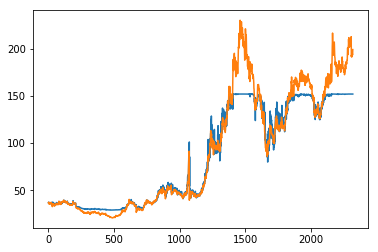

In [171]:
# import matplotlib.pyplot as plt
plt.figure()
plt.plot(pred)
plt.plot(y_train)
plt.show()

In [9]:
from sklearn import preprocessing as process
scaler = process.StandardScaler()
scaler.fit(X)
X_scalerd = scaler.transform(X)
y = pd.DataFrame(X_scalerd)[3].values

,date,code,name,weight
0,2020-06-30,600787,NaN,0.08
1,2020-06-30,600642,NaN,0.30
2,2020-06-30,600435,NaN,0.16
3,2020-06-30,600256,NaN,0.22
4,2020-06-30,600021,NaN,0.20
5,2020-06-30,603650,NaN,0.08
6,2020-06-30,601860,NaN,0.16
7,2020-06-30,601000,NaN,0.14
8,2020-06-30,600392,NaN,0.18
9,2020-06-30,600161,NaN,0.48


In [145]:
y_train[-6:]

[196.83, 193.74, 194.59, 193.25, 195.15, 198.96]